# QF 627 Programming and Computational Finance
## Problem-Sets for Exercise `6` | `Questions`

> Hi, Team. 👋

> Here we go again. The current notebook contains 10 questions that help you review our course content.

> Try to answer questions within a 120-minute time limit (and you may refer to lecture notes and review scripts while you are answering). This kind of timed task will improve your performance and prepare you well for the assessment down the line. Once you complete this, submit your script via eLearn.

> Enjoy!"🤞

### For standardization of your answers…

> Please execute the lines of code below before you start work on your answers.

In [189]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

from pandas_datareader import data as pdr

import datetime as dt
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")

> Let's set some print option.

In [191]:
np.set_printoptions(precision = 3)

plt.style.use("ggplot")

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

## 👇 Questions 1 to 4 ask you to build, execute, and backtest a `mean-reversion` strategy.

### <font color = blue> 👉 Question 1</font>. Let’s take a look at Google (`GOOGL`) as our security of interest, over the period of August 2011 to July 2020.

### Use a simple moving average of 42 days.

### Set a threshold value at two standard deviations of the current price, to deviate from the simple moving average to signal a positioning.

### <font color = green> NOTE: Your moving threshold value here is NOT an absolute value. You should create two additional columns containing your two standard deviations relative to your base line (a simple moving average of 42 days). </font>

### Visualize your buy and sell positions.

### Below are the lines of code that lead to an answer:

In [195]:
googl=\
(
    yf
    .download("GOOGL",
              start=dt.datetime(2011,8,1),
              end=dt.datetime(2020,7,31)
             )
)
googl

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-08-01,15.295796,15.402903,14.994494,15.184434,15.146927,158485356
2011-08-02,15.165165,15.257007,14.804054,14.824825,14.788208,127895976
2011-08-03,14.871622,15.090090,14.605355,15.044294,15.007134,152874972
2011-08-04,14.877377,14.986236,14.451201,14.452452,14.416753,196387416
2011-08-05,14.578078,14.764765,14.064064,14.490490,14.454699,236926836
...,...,...,...,...,...,...
2020-07-24,74.959503,75.771500,74.379501,75.410500,75.224236,29902000
2020-07-27,75.663002,76.877998,75.616501,76.471497,76.282608,27124000
2020-07-28,76.250000,76.300499,75.026001,75.182503,74.996796,30910000


In [196]:
googl_df= googl["Close"].to_frame()
googl_df.columns=["Close"]
googl_df

,Close
Date,
2011-08-01,15.184434
2011-08-02,14.824825
2011-08-03,15.044294
2011-08-04,14.452452
2011-08-05,14.490490
...,...
2020-07-24,75.410500
2020-07-27,76.471497
2020-07-28,75.182503


In [197]:
googl_df["SMA_42"]=\
(
    googl
    ["Close"]
    .rolling(window=42)
    .mean()
)
googl_df["STD_42"]=\
(
    googl
    ["Close"]
    .rolling(window=42)
    .std()
)
googl_df["upper"]=\
(
    googl_df["SMA_42"]
    +
    2 * googl_df["STD_42"] 
)
googl_df["lower"]=\
(
    googl_df["SMA_42"]
    -
    2 * googl_df["STD_42"]
)

googl_df["buy_positions"]=\
(
    np
    .where(googl_df["Close"]<googl_df["lower"],
           googl_df["Close"],np.nan)
)
googl_df["sell_positions"]=\
(
    np
    .where(googl_df["Close"]>googl_df["upper"],
           googl_df["Close"],np.nan)
)
date=googl_df.index

### <font color = red> Answer 1 is presented in the cell below: </font>

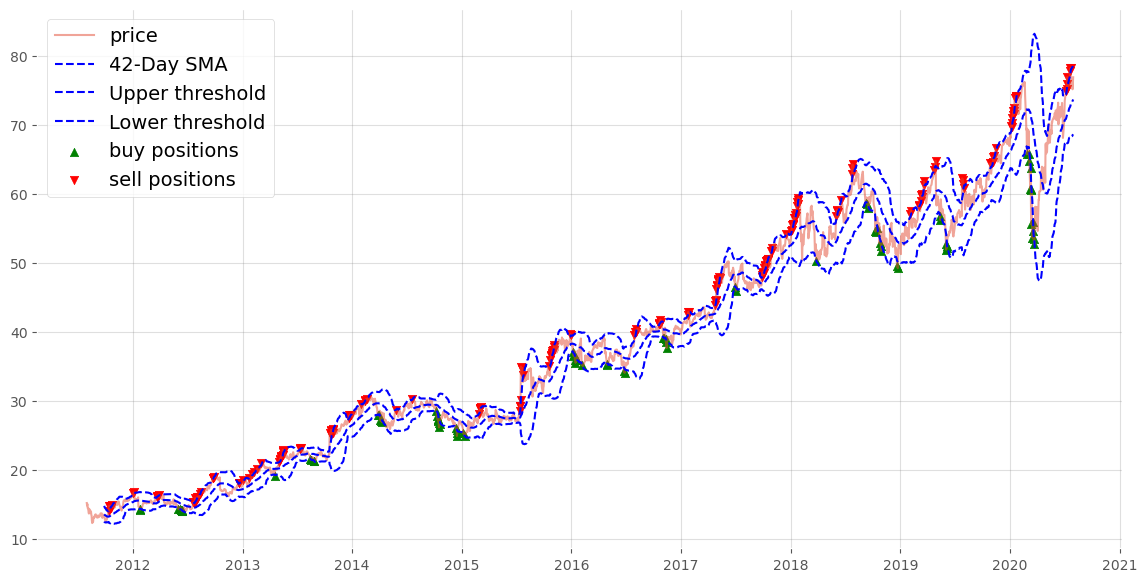

In [199]:
plt.figure(figsize=(14,7))
plt.plot(date,
         googl_df["Close"],
         label="price",
         alpha=0.5)
plt.plot(date,
         googl_df["SMA_42"],
         label='42-Day SMA',
         ls='--',
         color='blue')
plt.plot(date,
         googl_df["upper"],
         label="Upper threshold",
         ls="--",
         color="blue")
plt.plot(date,
         googl_df["lower"],
         label="Lower threshold",
         ls="--",
         color="blue")
plt.scatter(date,
            googl_df["buy_positions"],
            label="buy positions",
            marker="^",
            color="green")
plt.scatter(date,
            googl_df["sell_positions"],
            label="sell positions",
            marker="v",
            color="red")
plt.legend()
plt.show()

### <font color = blue> 👉 Question 2</font>. Let’s expand this strategy to two more securities, Apple (`AAPL`) and Amazon (`AMZN`) over the same period of August 2011 to July 2020. 

### When using the strategy above, which of those two securities has the greater Sharpe Ratio?

### Below are the lines of code that lead to an answer:

In [202]:
start_date=dt.datetime(2011,8,1)
end_date=dt.datetime(2020,7,31)

In [203]:
aapl=\
(
    yf
    .download("AAPL",
              start=start_date,
              end=end_date)
)

[*********************100%%**********************]  1 of 1 completed


In [204]:
df1=aapl["Close"].to_frame()
df1.columns=["Close"]

In [205]:
df1["Returns"]=\
(
    np
    .log(df1["Close"]/df1["Close"].shift(1)
        )
)
df1["SMA_42"]=\
(
    df1
    ["Close"]
    .rolling(window=42)
    .mean()
)
df1["STD_42"]=\
(
    df1
    ["Close"]
    .rolling(window=42)
    .std()
)
df1["upper"]=\
(
    df1["SMA_42"]
    +
    2 * df1["STD_42"] 
)
df1["lower"]=\
(
    df1["SMA_42"]
    -
    2 * df1["STD_42"]
)

In [206]:
df1["buy_positions"]=\
(
    np
    .where(df1["Close"]<df1["lower"],
           1,np.nan)
)
df1["sell_positions"]=\
(
    np
    .where(df1["Close"]>df1["upper"],
           -1,df1["buy_positions"])
)
df1["positions"]=\
(
    np
    .where((df1["Close"]<=df1["upper"])&(df1["Close"]>=df1["lower"]),
           0,df1["sell_positions"])
)
# or
# df1["position"] = 0
# df1["buy_signal"] = np.where(df1["Close"] < df1["lower"], 1, 0)
# df1["sell_signal"] = np.where(df1["Close"] > df1["upper"], -1, 0)
# df1["position"] = df1["buy_signal"] + df1["sell_signal"]
df1["strategy_returns"]=\
(
    df1["positions"].shift(1)
    *
    df1["Returns"]
)

Sharpe_ratio_1=\
(
    (
    df1["strategy_returns"].mean()
    /
    df1["strategy_returns"].std()
    ) * np.sqrt(252)
)
Sharpe_ratio_1

0.18054281441413994

In [207]:
print(df1["strategy_returns"].mean())
print(df1["strategy_returns"].std())

8.495172085126944e-05
0.007469512233387546


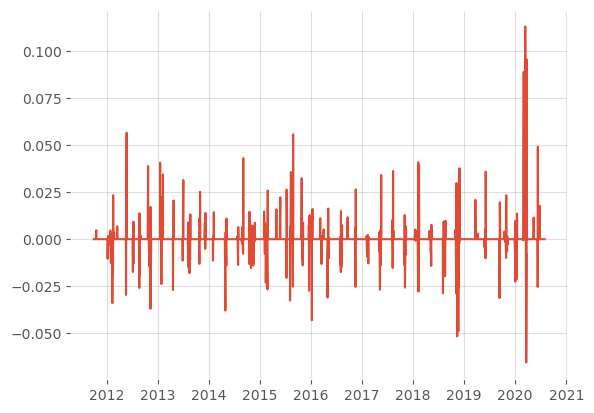

In [208]:
plt.plot(df1["strategy_returns"])

In [209]:
amzn=\
(
    yf
    .download("AMZN",
              start=start_date,
              end=end_date)
)

[*********************100%%**********************]  1 of 1 completed


In [210]:
df2=amzn["Close"].to_frame()
df2.columns=["Close"]
df2["Returns"]=\
(
    np
    .log(df2["Close"]/df2["Close"].shift(1)
        )
)
df2["SMA_42"]=\
(
    df2
    ["Close"]
    .rolling(window=42)
    .mean()
)
df2["STD_42"]=\
(
    df2
    ["Close"]
    .rolling(window=42)
    .std()
)
df2["upper"]=\
(
    df2["SMA_42"]
    +
    2 * df2["STD_42"] 
)
df2["lower"]=\
(
    df2["SMA_42"]
    -
    2 * df2["STD_42"]
)
df2["buy_positions"]=\
(
    np
    .where(df2["Close"]<df2["lower"],
           1.0,np.nan)
)
df2["sell_positions"]=\
(
    np
    .where(df2["Close"]>df2["upper"],
           -1.0,df2["buy_positions"])
)
df2["positions"]=\
(
    np
    .where((df2["Close"]<=df2["upper"])&(df2["Close"]>=df2["lower"]),
           0,df2["sell_positions"])
)
df2["strategy_returns"]=\
(
    df2["positions"].shift(1)
    *
    df2["Returns"]
)
Sharpe_ratio_2=\
(
    (
    df2["strategy_returns"].mean()
    /
    df2["strategy_returns"].std()
    ) * np.sqrt(252)
)
Sharpe_ratio_2

-0.13030464496579053

In [211]:
(df1["strategy_returns"] > 0).sum()

159

In [212]:
(df1["strategy_returns"] < 0).sum()

158

In [213]:
(df2["strategy_returns"] > 0).sum()

149

In [214]:
(df2["strategy_returns"] < 0).sum()

159

### <font color = red> Answer 2 </font>

    The answer is ____AAPL________ .

### <font color = blue> 👉 Question 3</font>. Let’s suppose that you started from a `$200,000` capital base for each of the three securities.

### Disregarding commission, how much will you have in the end in your account for each of the securities as a result of the mean-reversion strategy-based trading?

### Below are the lines of code that lead to an answer:

In [218]:
initial_capital=2e5


$$
\text{Cumulative Return}_t = \exp\left( \sum_{i=1}^{t} \text{Strategy Return}_i \right)
$$


In [220]:
df1["cumulative_returns"] =\
(
    df1["strategy_returns"]
    .cumsum()
    .apply(np.exp)
)
df2["cumulative_returns"] =\
(
    df2["strategy_returns"]
    .cumsum()
    .apply(np.exp)
)

In [221]:
googl_df["buy_positions"] =\
(
    np
    .where(googl_df["Close"] < googl_df["lower"],
           1, 0)
)

googl_df["sell_positions"] =\
(
    np
    .where(googl_df["Close"] > googl_df["upper"],
           -1, 0)
)
googl_df["positions"] = googl_df["buy_positions"] + googl_df["sell_positions"]
googl_df["Returns"]=\
(
    np
    .log(googl_df["Close"]/googl_df["Close"].shift(1)
        )
)
googl_df["strategy_returns"]=\
(
    googl_df["positions"].shift(1)
    *
    googl_df["Returns"]
)
googl_df["cumulative_returns"] =\
(
    googl_df["strategy_returns"]
    .cumsum()
    .apply(np.exp)
)

In [222]:
googl_df["positions"].value_counts()

positions
 0    1970
-1     213
 1      82
Name: count, dtype: int64


$$
\text{Final Capital} = \text{Initial Capital} \times \text{Cumulative Return}_{\text{final day}}
$$


In [224]:
final_capital1=\
    df1["cumulative_returns"].iloc[-1]*initial_capital
final_capital2=\
    df2["cumulative_returns"].iloc[-1]*initial_capital
final_capital3=\
    googl_df["cumulative_returns"].iloc[-1]*initial_capital

In [225]:
data=pd.DataFrame({"Ticker":["GOOGL","AAPL","AMZN"],
                   "Final Capital":[final_capital3,final_capital1,final_capital2]})
data

,Ticker,Final Capital
0,GOOGL,237007.908622
1,AAPL,241571.390441
2,AMZN,173822.059724


### <font color = red> Answer 3 </font>

    GOOGL : _237007.908622___________ 
    
    AAPL  : _241571.390441___________ 
     
    AMZN  : _173822.059724___________ 
    

### <font color = blue> 👉 Question 4</font>. What are the compound annual growth rates of each of the securities, based on the current mean-reversion strategy-based trading? 

### Below are the lines of code that lead to an answer:

$$
\text{CAGR} = \left( \frac{\text{End Value}}{\text{Start Value}} \right)^{\frac{365}{\text{Total Days}}} - 1
$$


In [230]:
start_year=2011
end_year=2020
n_years=end_year-start_year

In [231]:
CAGR_googl=\
(
    (final_capital3/initial_capital)
    **(1/n_years)
    -1
)
CAGR_appl=\
(
    (final_capital1/initial_capital)
    **(1/n_years)
    -1
)
CAGR_amzn=\
(
    (final_capital2/initial_capital)
    **(1/n_years)
    -1
)

In [232]:
data2=pd.DataFrame({"Tickers":["GOOGL","AAPL","AMZN"],
       "CAGR":[CAGR_googl,CAGR_appl,CAGR_amzn]})
data2

,Tickers,CAGR
0,GOOGL,0.019043
1,AAPL,0.021205
2,AMZN,-0.015466


### <font color = red> Answer 4 </font>

    GOOGL : ___0.019043________ 
    
    AAPL  : ___0.021205________ 
     
    AMZN  : ___-0.015466_______ 

## 👇 Questions 5 and 7 ask you to predict the future market direction. Let's focus on analyzing `GE`. `These questions are designed to help deepen your understanding of the key points covered in the Lesson 5 lecture notes`. While answering, please make sure to revisit and refer to the `Lecture 5 notebook`.

###  <font color = blue> 👉 Question 5. </font> First, predict tomorrow's log returns using `today's returns`, `yesterday's returns`, and `the day before yesterday's returns` — a total of `three lags`. 

### Next, predict `tomorrow's log returns` using a lag of `10 days`. 

### Finally, predict `tomorrow's log returns` using a lag of `22 days`. 

### You can achieve this using the least squares function in the numpy library's linear algebra module. 

### Then, plot the gross performance of the base instrument and the three strategies that can be constructed based on these three lagged variables over time. 

### This analysis is conducted in-sample and does not consider transaction costs. </font>

### Below are the lines of code that lead to an answer:

In [237]:
GE=\
(
    yf
    .download("GE",
              start=start_date,
              end=end_date)
)

[*********************100%%**********************]  1 of 1 completed


In [238]:
GE_df=GE["Close"].to_frame()
GE_df.columns=["Price"]
GE_df

,Price
Date,
2011-08-01,86.120102
2011-08-02,82.477844
2011-08-03,83.723885
2011-08-04,78.931442
2011-08-05,79.123138
...,...
2020-07-24,34.191166
2020-07-27,33.443546
2020-07-28,34.340691


In [239]:
GE_df["Return"]=\
(
    np
    .log(GE_df["Price"]
         /
         GE_df["Price"].shift(1)
        )
)
GE_df=GE_df.dropna()
GE_df

,Price,Return
Date,,
2011-08-02,82.477844,-0.043213
2011-08-03,83.723885,0.014995
2011-08-04,78.931442,-0.058945
2011-08-05,79.123138,0.002426
2011-08-08,73.947311,-0.067653
...,...,...
2020-07-24,34.191166,-0.025901
2020-07-27,33.443546,-0.022108
2020-07-28,34.340691,0.026472


In [240]:
LAGS=3
COLS=[]

In [241]:
for LAG in range(1,LAGS+1):
    COL=f"lag_{LAG}"
    GE_df[COL]=GE_df["Return"].shift(LAG)
    COLS.append(COL)

In [242]:
GE_df=GE_df.dropna()
GE_df

,Price,Return,lag_1,lag_2,lag_3
Date,,,,,
2011-08-05,79.123138,0.002426,-0.058945,0.014995,-0.043213
2011-08-08,73.947311,-0.067653,0.002426,-0.058945,0.014995
2011-08-09,76.487305,0.033772,-0.067653,0.002426,-0.058945
2011-08-10,72.317879,-0.056053,0.033772,-0.067653,0.002426
2011-08-11,75.145416,0.038354,-0.056053,0.033772,-0.067653
...,...,...,...,...,...
2020-07-24,34.191166,-0.025901,-0.002837,0.002837,0.024444
2020-07-27,33.443546,-0.022108,-0.025901,-0.002837,0.002837
2020-07-28,34.340691,0.026472,-0.022108,-0.025901,-0.002837


In [243]:
OLS1=\
    np\
    .linalg\
    .lstsq(GE_df[COLS],
           np.sign(GE_df["Return"]
                  ),
           rcond=None)[0]
OLS1

array([-1.184,  1.754,  0.639])

In [244]:
GE_df["Prediction_1"] =\
    np\
    .sign(np.dot(GE_df[COLS], 
           OLS1)
         )

GE_df

,Price,Return,lag_1,lag_2,lag_3,Prediction_1
Date,,,,,,
2011-08-05,79.123138,0.002426,-0.058945,0.014995,-0.043213,1.0
2011-08-08,73.947311,-0.067653,0.002426,-0.058945,0.014995,-1.0
2011-08-09,76.487305,0.033772,-0.067653,0.002426,-0.058945,1.0
2011-08-10,72.317879,-0.056053,0.033772,-0.067653,0.002426,-1.0
2011-08-11,75.145416,0.038354,-0.056053,0.033772,-0.067653,1.0
...,...,...,...,...,...,...
2020-07-24,34.191166,-0.025901,-0.002837,0.002837,0.024444,1.0
2020-07-27,33.443546,-0.022108,-0.025901,-0.002837,0.002837,1.0
2020-07-28,34.340691,0.026472,-0.022108,-0.025901,-0.002837,-1.0


In [245]:
GE_df2=GE["Close"].to_frame()
GE_df2.columns=["Price"]
GE_df2["Return"] = \
    np\
    .log(GE["Close"] 
         / 
         GE["Close"].shift(1)
        )

In [246]:
GE_df2["lag_10"]=\
    GE_df2["Return"].shift(10)
GE_df2=GE_df2.dropna()
previous_return=\
    GE_df2["lag_10"].values.reshape(-1,1)

In [247]:
OLS_2=\
    np\
    .linalg\
    .lstsq(previous_return,
           np.sign(GE_df2["Return"],
                  ),
           rcond=None)[0]
OLS_2

array([0.71])

In [248]:
GE_df2["Prediction_2"]=\
(
    np
    .sign(np.dot(previous_return, 
           OLS_2)
         )
)

GE_df2

,Price,Return,lag_10,Prediction_2
Date,,,,
2011-08-16,77.397865,-0.014751,-0.043213,-1.0
2011-08-17,77.781258,0.004941,0.014995,1.0
2011-08-18,73.515991,-0.056398,-0.058945,-1.0
2011-08-19,72.317879,-0.016432,0.002426,1.0
2011-08-22,72.413727,0.001324,-0.067653,-1.0
...,...,...,...,...
2020-07-24,34.191166,-0.025901,0.016579,1.0
2020-07-27,33.443546,-0.022108,0.001494,1.0
2020-07-28,34.340691,0.026472,0.026511,1.0


In [249]:
GE_df3=GE["Close"].to_frame()
GE_df3.columns=["Price"]
GE_df3["Return"] = \
    np\
    .log(GE["Close"] 
         / 
         GE["Close"].shift(1)
        )

In [250]:
GE_df3["lag_22"]=\
    GE_df3["Return"].shift(22)
GE_df3=GE_df3.dropna()
previous_return=\
    GE_df3["lag_22"].values.reshape(-1,1)

In [251]:
OLS_3=\
    np\
    .linalg\
    .lstsq(previous_return,
           np.sign(GE_df3["Return"]
                  ),
           rcond=None)[0]
OLS_3

array([-0.345])

In [252]:
GE_df3["Prediction_3"]=\
(
    np
    .sign(np.dot(previous_return,
                 OLS_3)
         )
)

GE_df3

,Price,Return,lag_22,Prediction_3
Date,,,,
2011-09-01,77.637489,-0.006767,-0.043213,1.0
2011-09-02,75.528816,-0.027536,0.014995,-1.0
2011-09-06,73.084671,-0.032896,-0.058945,1.0
2011-09-07,75.720512,0.035430,0.002426,-1.0
2011-09-08,74.714096,-0.013380,-0.067653,1.0
...,...,...,...,...
2020-07-24,34.191166,-0.025901,-0.005698,1.0
2020-07-27,33.443546,-0.022108,-0.069503,1.0
2020-07-28,34.340691,0.026472,0.022711,-1.0


### <font color = red> Answer 5 </font>

    The answer is shown in the below plot.

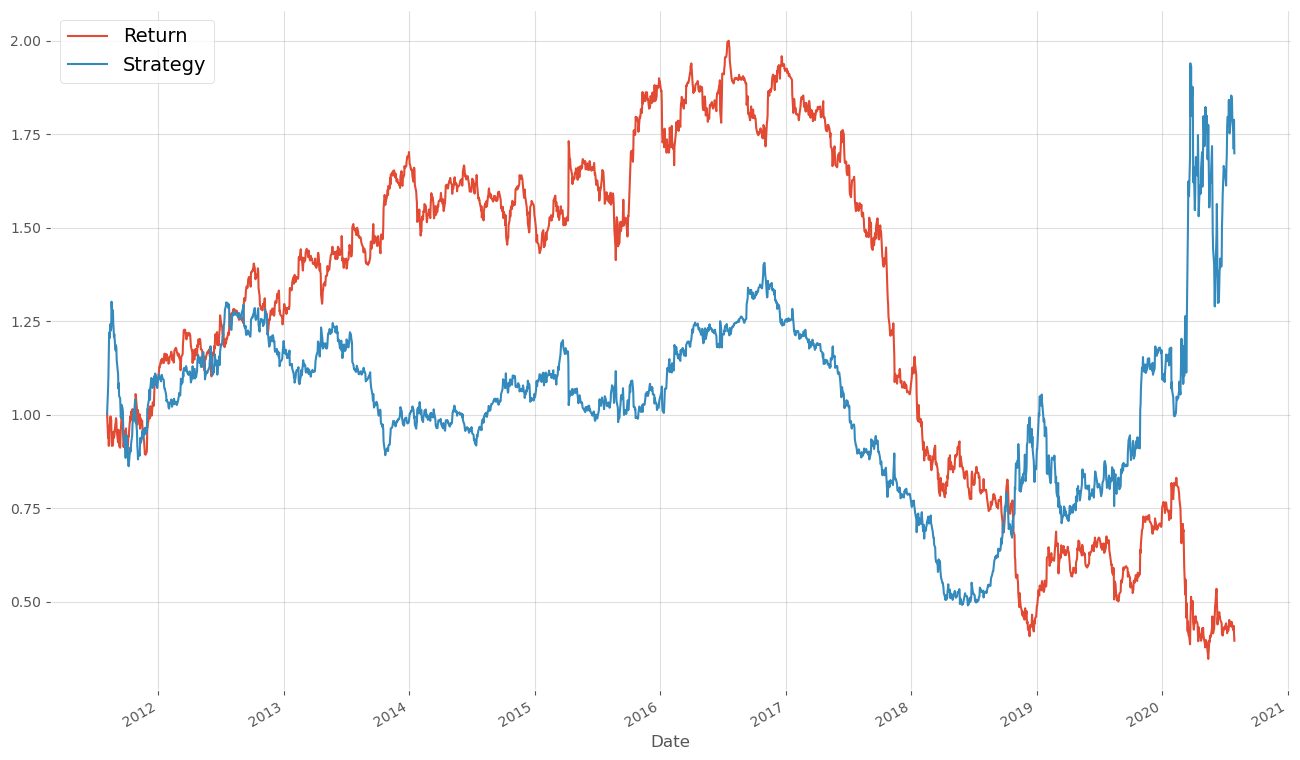

In [254]:
GE_df["Strategy"] =\
    GE_df["Prediction_1"] * GE_df["Return"]
cumulative_performance_1 =\
(
    GE_df
    [["Return", "Strategy"]]
    .cumsum()
    .apply(np.exp)
    .plot(figsize = (16,10)
         )
)

<Axes: xlabel='Date'>

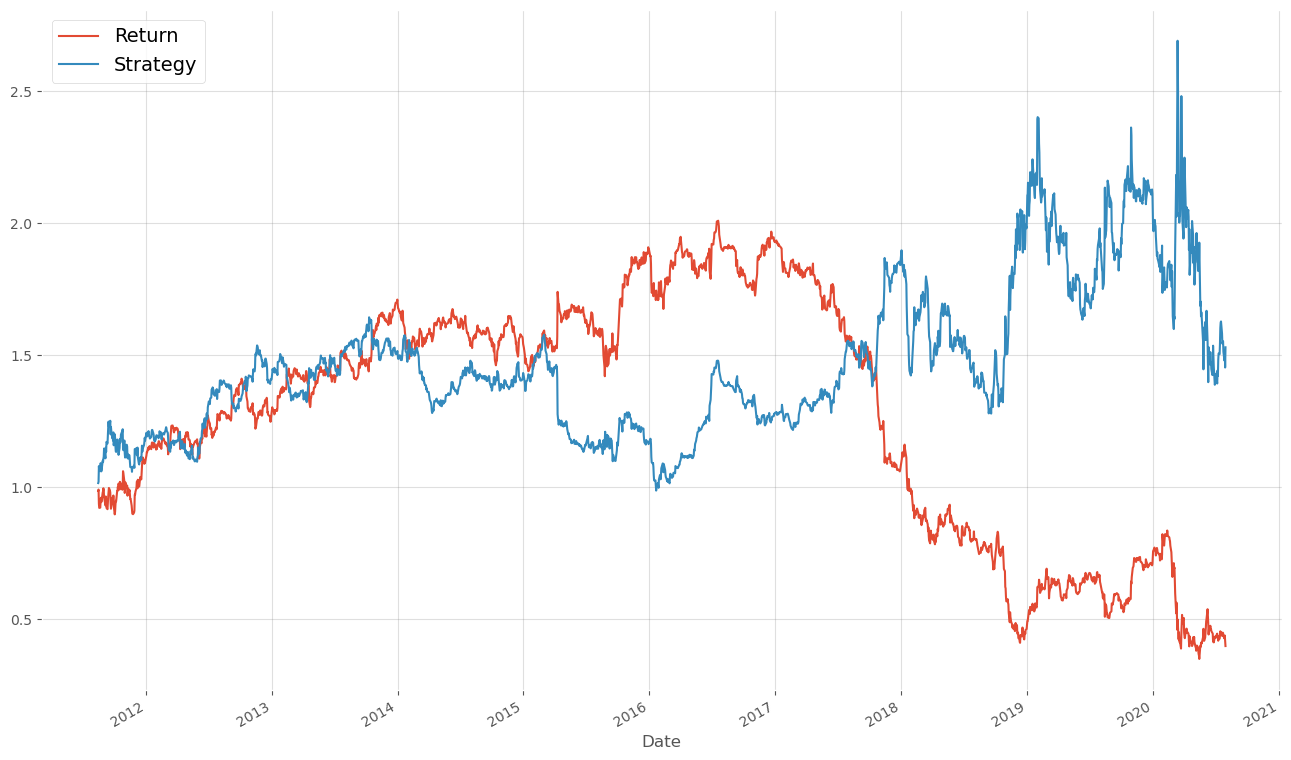

In [255]:
GE_df2["Strategy"] =\
    GE_df2["Prediction_2"] * GE_df2["Return"]
GE_df2\
    [["Return", "Strategy"]] \
    .cumsum() \
    .apply(np.exp) \
    .plot(figsize = (16,10)
         )

<Axes: xlabel='Date'>

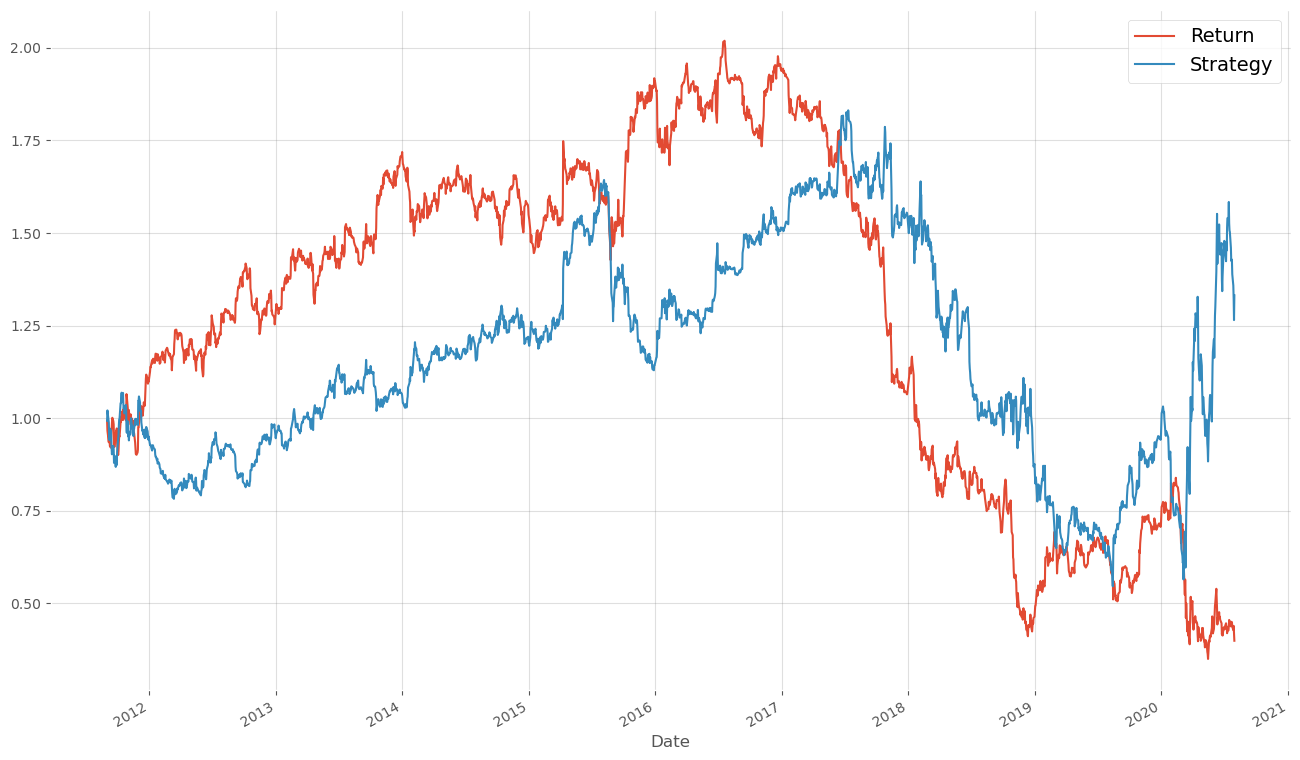

In [256]:
GE_df3["Strategy"] =\
    GE_df3["Prediction_3"] * GE_df3["Return"]
GE_df3\
    [["Return", "Strategy"]] \
    .cumsum() \
    .apply(np.exp) \
    .plot(figsize = (16,10)
         )

###  <font color = blue> 👉 Question 6. </font> Now, let's define performance metrics for accuracy.

### In Chapter 4 of the Lesson 5 lecture note, we calculated accuracy with the operational knowledge that, while it's theoretically possible for both returns and predictions to be positive, negative, or zero, only returns contained zero values. Predictions, on the other hand, did not include zeros; as a result, we considered them invalid predictions rather than irrelevant.

### Below, you will find two prototype functions (namely, `calculate_accuracy_A` and `calculate_accuracy_B`) that you can adapt for accuracy calculations. Please evaluate both functions and decide which one you prefer to use as a prototype for your work. Subsequently, explain why you favor the specific function for assessing accuracy.

### Then, using the chosen prototype of function, revise it and execute to assess the accuracy of the predictions obtained from the above lags approaches.

In [258]:
def calculate_accuracy_A(returns, predictions,tolerance=1e-5):

    # Ensure returns and predictions have the same length
    assert len(returns) == len(predictions), "Returns and predictions must have the same length."

    # Initialize variables for valid and total predictions
    valid_predictions = 0
    total_predictions = len(returns)

    # Loop through each data point
    for i in range(total_predictions):
        # Check if the return is zero (valid) and the prediction is not zero (invalid)
        if returns[i] == 0 and predictions[i] != 0:
            valid_predictions += 1
        # Check if the return is not zero and the prediction matches closely (within a tolerance, if needed)
        elif returns[i] != 0 and abs(returns[i] - predictions[i]) < tolerance:
            valid_predictions += 1

    # Calculate accuracy
    accuracy_A = valid_predictions / total_predictions

    return accuracy_A, valid_predictions, total_predictions
accuracies_A1, valid_predictions, total_predictions=\
    calculate_accuracy_A(GE_df["Return"].values,
                         GE_df["Prediction_1"].values,
                         tolerance=1e-5)

print(f"the A_3 correct time is {valid_predictions}")
print(f"the A_3 wrong time is {total_predictions-valid_predictions}")   
print(f"the A_3 accuracy of 3-day: {accuracies_A1 * 100:.2f}%")

the A_3 correct time is 39
the A_3 wrong time is 2222
the A_3 accuracy of 3-day: 1.72%


In [259]:
def calculate_accuracy_A(returns, predictions,tolerance=1e-5):

    # Ensure returns and predictions have the same length
    assert len(returns) == len(predictions), "Returns and predictions must have the same length."

    # Initialize variables for valid and total predictions
    valid_predictions = 0
    total_predictions = len(returns)

    # Loop through each data point
    for i in range(total_predictions):
        # Check if the return is zero (valid) and the prediction is not zero (invalid)
        if returns[i] == 0 and predictions[i] != 0:
            valid_predictions += 1
        # Check if the return is not zero and the prediction matches closely (within a tolerance, if needed)
        elif returns[i] != 0 and abs(returns[i] - predictions[i]) < tolerance:
            valid_predictions += 1

    # Calculate accuracy
    accuracy_A = valid_predictions / total_predictions

    return accuracy_A, valid_predictions, total_predictions
accuracies_A2, valid_predictions, total_predictions=\
    calculate_accuracy_A(GE_df2["Return"].values,
                         GE_df2["Prediction_2"].values,
                         tolerance=1e-5)

print(f"the A_10 correct time is {valid_predictions}")
print(f"the A_10 wrong time is {total_predictions-valid_predictions}")   
print(f"the A_10 accuracy of 3-day: {accuracies_A2 * 100:.2f}%")

the A_10 correct time is 38
the A_10 wrong time is 2216
the A_10 accuracy of 3-day: 1.69%


In [260]:
def calculate_accuracy_A(returns, predictions,tolerance=1e-5):

    # Ensure returns and predictions have the same length
    assert len(returns) == len(predictions), "Returns and predictions must have the same length."

    # Initialize variables for valid and total predictions
    valid_predictions = 0
    total_predictions = len(returns)

    # Loop through each data point
    for i in range(total_predictions):
        # Check if the return is zero (valid) and the prediction is not zero (invalid)
        if returns[i] == 0 and predictions[i] != 0:
            valid_predictions += 1
        # Check if the return is not zero and the prediction matches closely (within a tolerance, if needed)
        elif returns[i] != 0 and abs(returns[i] - predictions[i]) < tolerance:
            valid_predictions += 1

    # Calculate accuracy
    accuracy_A = valid_predictions / total_predictions

    return accuracy_A, valid_predictions, total_predictions
accuracies_A3, valid_predictions, total_predictions=\
    calculate_accuracy_A(GE_df3["Return"].values,
                         GE_df3["Prediction_3"].values,
                         tolerance=1e-5)

print(f"the A_22 correct time is {valid_predictions}")
print(f"the A_22 wrong time is {total_predictions-valid_predictions}")   
print(f"the A_22 accuracy of 3-day: {accuracies_A3 * 100:.2f}%")

the A_22 correct time is 39
the A_22 wrong time is 2203
the A_22 accuracy of 3-day: 1.74%


In [261]:
def calculate_accuracy_B(returns_series, predictions_series):
    
    # Correct predictions
    correct_positive = (returns_series > 0) & (predictions_series > 0)
    correct_negative = (returns_series < 0) & (predictions_series < 0)
    correct_zero = (returns_series == 0) & (predictions_series == 0)

    total_correct = correct_positive.sum() + correct_negative.sum() + correct_zero.sum()

    # Incorrect predictions
    incorrect_positive_return = (returns_series > 0) & (predictions_series <= 0)
    incorrect_negative_return = (returns_series < 0) & (predictions_series >= 0)
    incorrect_zero_return = (returns_series == 0) & (predictions_series != 0)

    total_incorrect =\
    (
        incorrect_positive_return.sum()
        + incorrect_negative_return.sum()
        + incorrect_zero_return.sum()
    )

    # Calculate Hit
    accuracy_B = total_correct / (total_correct + total_incorrect)
    
    return accuracy_B,total_correct,total_incorrect
accuracies_B1, total_correct, total_incorrect=\
    calculate_accuracy_A(GE_df["Return"].values,
                         GE_df["Prediction_1"].values
                         )

print(f"the B_3 correct time is {total_correct}")
print(f"the B_3 wrong time is {total_incorrect}")   
print(f"the B_3 accuracy of 3-day: {accuracies_B1 * 100:.2f}%")   

the B_3 correct time is 39
the B_3 wrong time is 2261
the B_3 accuracy of 3-day: 1.72%


In [262]:
def calculate_accuracy_B(returns_series, predictions_series):
    
    # Correct predictions
    correct_positive = (returns_series > 0) & (predictions_series > 0)
    correct_negative = (returns_series < 0) & (predictions_series < 0)
    correct_zero = (returns_series == 0) & (predictions_series == 0)

    total_correct = correct_positive.sum() + correct_negative.sum() + correct_zero.sum()

    # Incorrect predictions
    incorrect_positive_return = (returns_series > 0) & (predictions_series <= 0)
    incorrect_negative_return = (returns_series < 0) & (predictions_series >= 0)
    incorrect_zero_return = (returns_series == 0) & (predictions_series != 0)

    total_incorrect =\
    (
        incorrect_positive_return.sum()
        + incorrect_negative_return.sum()
        + incorrect_zero_return.sum()
    )

    # Calculate Hit
    accuracy_B = total_correct / (total_correct + total_incorrect)
    
    return accuracy_B,total_correct,total_incorrect
accuracies_B2, total_correct, total_incorrect=\
    calculate_accuracy_A(GE_df2["Return"].values,
                         GE_df2["Prediction_2"].values
                         )

print(f"the B_10 correct time is {total_correct}")
print(f"the B_10 wrong time is {total_incorrect}")   
print(f"the B_10 accuracy of 3-day: {accuracies_B2 * 100:.2f}%")   

the B_10 correct time is 38
the B_10 wrong time is 2254
the B_10 accuracy of 3-day: 1.69%


In [263]:
def calculate_accuracy_B(returns_series, predictions_series):
    
    # Correct predictions
    correct_positive = (returns_series > 0) & (predictions_series > 0)
    correct_negative = (returns_series < 0) & (predictions_series < 0)
    correct_zero = (returns_series == 0) & (predictions_series == 0)

    total_correct = correct_positive.sum() + correct_negative.sum() + correct_zero.sum()

    # Incorrect predictions
    incorrect_positive_return = (returns_series > 0) & (predictions_series <= 0)
    incorrect_negative_return = (returns_series < 0) & (predictions_series >= 0)
    incorrect_zero_return = (returns_series == 0) & (predictions_series != 0)

    total_incorrect =\
    (
        incorrect_positive_return.sum()
        + incorrect_negative_return.sum()
        + incorrect_zero_return.sum()
    )

    # Calculate Hit
    accuracy_B = total_correct / (total_correct + total_incorrect)
    
    return accuracy_B,total_correct,total_incorrect
accuracies_B3, total_correct, total_incorrect=\
    calculate_accuracy_A(GE_df3["Return"].values,
                         GE_df3["Prediction_3"].values
                         )

print(f"the B_22 correct time is {total_correct}")
print(f"the B_22 wrong time is {total_incorrect}")   
print(f"the B_22 accuracy of 3-day: {accuracies_B3 * 100:.2f}%")   

the B_22 correct time is 39
the B_22 wrong time is 2242
the B_22 accuracy of 3-day: 1.74%


### Below are the lines of code that lead to an answer:

>Method A is more concerned with the accuracy of the value (i.e. the error between the predicted value and the actual value, not just the direction).
>
>Method B only cares about whether the direction of prediction is correct, but does not care about the specific size of the predicted value. It is more simple and clear, and is suitable for judging whether the direction of prediction is correct.
>
>For me, I prefer the latter one because it catches more wrong times while still showing the same accuracy and correct time.

### <font color = red> Answer 6 </font>
    The prediction is __39___ times correct and _2261____ wrong. The accuracy is __1.72____ % with a 3-day lag.
    
    The prediction is __38___ times correct and __2254___ wrong. The accuracy is __1.69____ % with a 10-day lag.
    
    The prediction is __39___ times correct and __2242___ wrong. The accuracy is _1.74____ % with a 22-day lag.
    

###  <font color = blue> 👉 Question 7. </font> Please calculate the Sharpe Ratio of the strategies for  `GE`.

### Below are the lines of code that lead to an answer:

In [269]:
sharpe_ratio1 = \
        (GE_df["Strategy"].mean() / GE_df["Strategy"].std()) * np.sqrt(252)
sharpe_ratio2 = \
        (GE_df2["Strategy"].mean() / GE_df2["Strategy"].std()) * np.sqrt(252)
sharpe_ratio3 = \
        (GE_df3["Strategy"].mean() / GE_df3["Strategy"].std()) * np.sqrt(252)
print(f"3-days:{sharpe_ratio1:.4f}")
print(f"10-days:{sharpe_ratio2:.4f}")
print(f"22-days:{sharpe_ratio3:.4f}")

3-days:0.1855
10-days:0.1509
22-days:0.1022


### <font color = red> Answer 7 </font>

    The strategy for GE with a 3-day lag leads to a Sharpe ratio of ___0.1855_______ .
    
    The strategy for GE with a 10-day lag leads to a Sharpe ratio of ___0.1509_______ .
        
    The strategy for GE with a 22-day lag leads to a Sharpe ratio of ___0.1022_______ .

## 👇 Questions 8 to 10 ask you to build, execute, and backtest a momentum strategy.

###  <font color = blue> 👉 Question 8. </font> Our securities of interest are Goldman Sachs (`GS`) and JP Morgan Chase (`JPM`) stock. The time period for analysis is from November 2013 to October 2021.

### Here’s our use of the momentum indicator, reflecting the moving averages of stock prices for trend following.

### The two moving windows are 24 days and 58 days.

### Calculate and visualize the maximum drawdowns and the longest drawdown periods for `GS` and `JPM`.

### Below are the lines of code that lead to an answer:

In [274]:
JPM=\
(
    yf
    .download("JPM",
              start=dt.datetime(2013,11,1),
              end=dt.datetime(2021,10,31)
             )
)

[*********************100%%**********************]  1 of 1 completed


In [275]:
GS=\
(
    yf
    .download("GS",
              start=dt.datetime(2013,11,1),
              end=dt.datetime(2021,10,31)
             )
)

[*********************100%%**********************]  1 of 1 completed


$$ 
\text{drawdown}_t ​= \text{max gross performance}_t − \text{cumulative returns}_t
$$

In [277]:
short=24
long=58

In [278]:
def apply_strategy(stock,short,long):
    stock["short_SMA"]=\
    (
        stock
        ["Close"]
        .rolling(window=short,
                 min_periods=1,
                 center=False)
        .mean()
    )
    stock["long_SMA"]=\
    (
        stock
        ["Close"]
        .rolling(window=long,
                 min_periods=1,
                 center=False)
        .mean()
    )
    stock["Positions"]=\
        np.where(stock["short_SMA"]>stock["long_SMA"],
                 1 , -1)
    stock["Return"] = stock["Close"].pct_change()
    stock["Strategy_return"] = \
        stock["Positions"].shift(1) * stock["Return"]
    stock["cumulative_returns"] =\
    (
        stock["Strategy_return"]
        .cumsum()
        .apply(np.exp)
    )
    stock["max_gross_performance"] =\
    (
        stock
        ["cumulative_returns"]
        .cummax()
    )
    drawdown = stock["max_gross_performance"] - stock["cumulative_returns"]
    max_drawdown=drawdown.max()
    periods =\
    (
        drawdown[drawdown == 0].index[ 1 :   ].to_pydatetime()
        -
        drawdown[drawdown == 0].index[   : -1].to_pydatetime()
    )
    return stock, stock["cumulative_returns"], stock["max_gross_performance"],max_drawdown,periods
    

In [279]:
jpm_with_strategy, cumulative_returns1,max_gross_performance1,max_drawdown1, periods1=\
    apply_strategy(JPM,short,long)
max_drawdown1

0.5139216722240323

In [280]:
periods1.max()

datetime.timedelta(days=2328)

In [281]:
gs_with_strategy,cumulative_returns2,max_gross_performance2,max_drawdown2, periods2=\
    apply_strategy(GS,short,long)
max_drawdown2

1.011887998113363

In [282]:
periods2.max()

datetime.timedelta(days=800)

### <font color = red> Answer 8 (`visualization component`) is presented in the cell below: </font>

<Axes: xlabel='Date'>

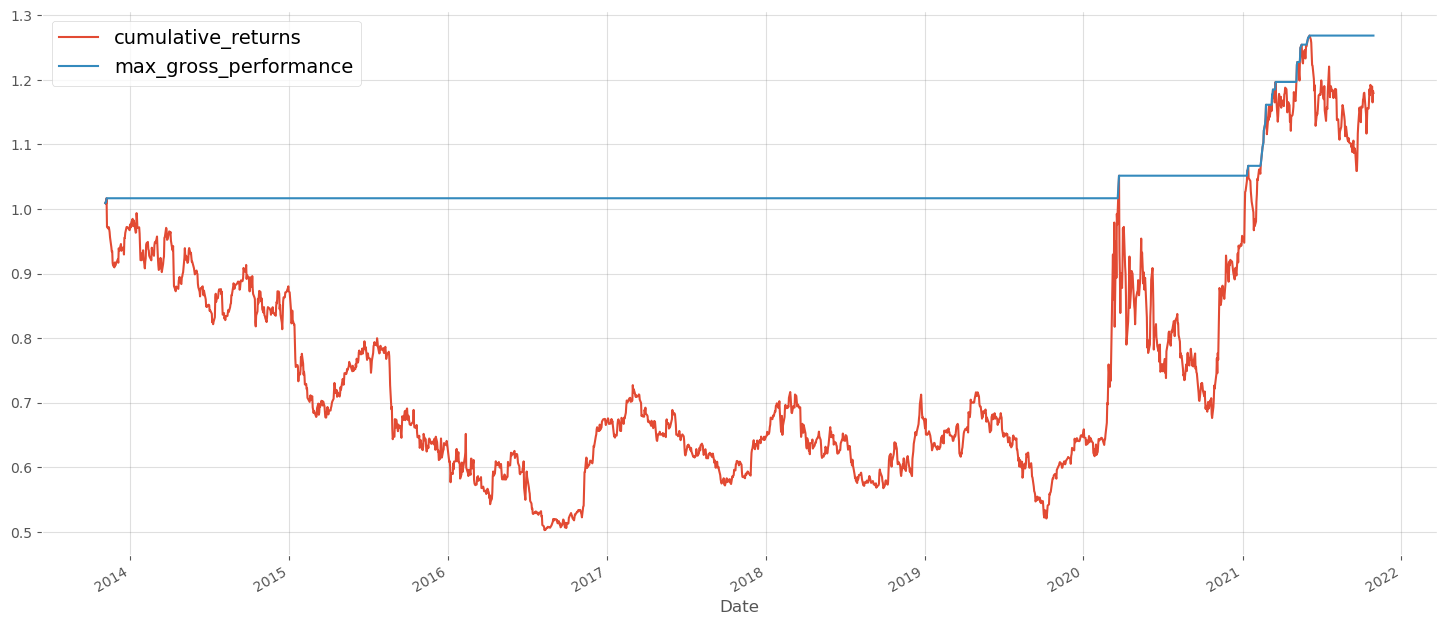

In [284]:
(
    jpm_with_strategy
    [["cumulative_returns", "max_gross_performance"]]
    .dropna()
    .plot(figsize = [18, 8]
         )
)

<Axes: xlabel='Date'>

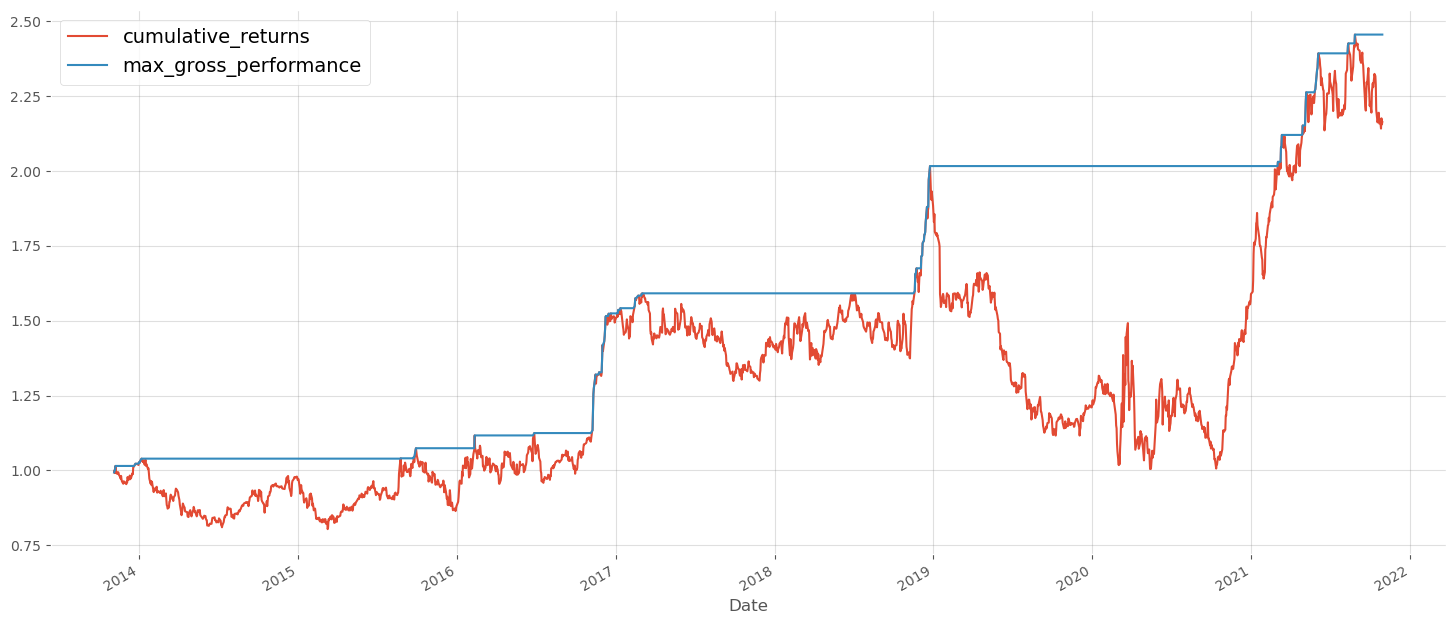

In [285]:
(
    gs_with_strategy
    [["cumulative_returns", "max_gross_performance"]]
    .dropna()
    .plot(figsize = [18, 8]
         )
)

### <font color = red> Answer 8 </font>
    
    As to GS,
    
    The maximum drawdown is about ___51.39_________ percentage points.
    The longest drawdown period lasts for ___2328_________ days.
    
    As to JPM,
    
    The maximum drawdown is about ___101.19_________ percentage points.
    The longest drawdown period lasts for _____800________ days.
    

###  <font color = blue> 👉 Question 9. </font>  If you had started with a capital of $300,000 for each of the three securities, how much would be left in your account after trading according to your above strategies for `GS` and `JPM`?

### Below are the lines of code that lead to an answer:

In [374]:
def apply_strategy_2(stock, short, long, initial_capital=3e5):
    stock["short_SMA"]=\
    (
        stock
        ["Close"]
        .rolling(window=short,
                 min_periods=1)
        .mean()
    )
    stock["long_SMA"]=\
    (
        stock
        ["Close"]
        .rolling(window=long,
                 min_periods=1)
        .mean()
    )
    stock["Position"]=\
        np.where(stock["short_SMA"]>stock["long_SMA"],
                 1 , -1)
    cash = initial_capital
    holding_shares = 0
    portfolio_total_values = [] 
    
    for i in range( len(stock)):
        current_price = stock["Close"].iloc[i]
        if stock["Position"].iloc[i] == 1 and holding_shares == 0:
            holding_shares = cash / current_price 
            cash = 0 
            
        elif stock["Position"].iloc[i] == -1 and holding_shares > 0:
            cash = holding_shares * current_price
            holding_shares = 0 
            
        portfolio_value = cash + holding_shares * current_price
        portfolio_total_values.append(portfolio_value)
        
    stock["Portfolio Value"] = portfolio_total_values
    return stock, stock["Portfolio Value"].iloc[-1]


In [376]:
short_window= 24
long_window= 58
jpm_with_strategy, final_value1 = \
    apply_strategy_2(JPM,short_window,long_window)
final_value1

596615.464402305

In [378]:
short = 24
long= 58
gs_with_strategy, final_value2 = \
    apply_strategy_2(GS,short,long)
final_value2

711177.6265386534

In [380]:
print({final_value1+final_value2})

{1307793.0909409584}


### <font color = red> Answer 9 </font>

    The answer is ___JPM:596615.4644,__GS:711177.6265,___
    total:1307793.0909____________________ .

###  <font color = blue> 👉 Question 10. </font> Using the current momentum strategy, how many trading opportunities were there for GS and JPM?

### Below are the lines of code that lead to an answer:

In [382]:
def apply_strategy_3(stock, short, long, initial_capital=3e5):
    stock["short_SMA"]=\
    (
        stock
        ["Close"]
        .rolling(window=short,
                 min_periods=1)
        .mean()
    )
    stock["long_SMA"]=\
    (
        stock
        ["Close"]
        .rolling(window=long,
                 min_periods=1)
        .mean()
    )
    stock["Position"]=\
        np.where(stock["short_SMA"]>stock["long_SMA"],
                 1 , -1)
    buy_signals=\
    (stock["Position"]==1)&(stock["Position"].shift(1)==-1)
    sell_signals=\
    (stock["Position"]==-1)&(stock["Position"].shift(1)==1)
    trading_opportunities = buy_signals.sum() + sell_signals.sum()
    return trading_opportunities

In [384]:
short = 24
long= 58
jpm_trading_opportunities = apply_strategy_3(JPM,short,long)
jpm_trading_opportunities

41

In [386]:
short = 24
long= 58
gs_trading_opportunities = apply_strategy_3(GS,short,long)
gs_trading_opportunities

38

### <font color = red> Answer 10 </font>

    The answer is ______41(JPM) & 38(GS)______________________ .

> 💯 “Thank you for putting your efforts into the individual assessment questions” 😊